# Случайни ефекти върху генетичната структура на популации


***

Изследвани са основни популационни модели върху генетичната структура на популации, както са представени в курса във ФМИ ["Въведение в изчислителната биология", доц. П. Рашков (ИМИ-БАН)](http://www.math.bas.bg/nummeth/rashkov/teaching/), 2018-2019г
***

## Стохастичен модел за популация с два фенотипа

Разглеждаме популация от белокрили и чернокрили молци.

Цветът на крилата на индивид от популацията се определя от локус с два алела. Означаваме ги с **W** и **w**.

Когато локусът е:
- **WW** или **Ww** - молецът е белокрил
- **ww** - молецът е чернокрил

#### Закон на Харди-Вайнберг

>В идеална популация съотношението между алелите остава непроменено с течение на поколенията.

Под идеална се имат предвид следните условия (за един локус с 2 алела):
- Поколенията са неприпокриващи се
- Чифтосването между индивидите е на случаен принцип
- Всички са еднакво способни да оцелеят
- Няма мутации
- Честотата на даден алел е еднаква за цялата популация

#### Подобрен модел

Нека бележим с $\alpha$ делът на белокрилите молци (WW или Ww), които оцеляват. А, с $\gamma$ делът на чернокрилите (ww), които оцеляват.

Очевидно, ако $\alpha > \gamma$, белокрилите имат предимство. Обратно, ако $\gamma > \alpha$ чернокрилите са повече.

Нека $p_n = \frac{\text{бр. W-алели}}{\text{бр. всички алели}}$

За да изследваме генотипа на бъдещите поколения, ще използваме [квадрата на Пънет](https://en.wikipedia.org/wiki/Punnett_square):


<table style="width: 50%; text-align: center !important;">
    <tbody>
        <tr>
            <td></td>
            <td></td>
            <th colspan=2>Женски</th>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <th>W</th>
            <th>w</th>
        </tr>
        <tr>
            <th rowspan=2>Мъжки</th>
            <th>W</th>
            <td>$\alpha p_n^2$</td>
            <td>$\alpha p_n (1 - p_n)$</td>
        </tr>
        <tr>
            <th>w</th>
            <td>$\alpha p_n (1 - p_n)$</td>
            <td>$\gamma (1 - p_n)^2$</td>
        </tr>
    </tbody>
</table>

От тук следва, че вероятностите за генотипа на потомството са:
- **WW**: $\alpha p_n^2$
- **Ww**: $2 \alpha p_n (1 - p_n)$
- **ww**: $\gamma (1 - p_n)^2$

Тогава за $p_{n+1}$ получаваме:
\begin{equation}
p_{n+1} = \frac{\alpha p_n^2 + 2 \alpha p_n (1 - p_n) \frac{1}{2}}{\alpha p_n^2 + 2 \alpha p_n (1 - p_n) + \gamma (1 - p_n)^2} \Leftrightarrow p_{n+1} = \frac{\alpha p_n}{p_n^2(\gamma - \alpha) - 2 p_n (\gamma - \alpha) + \gamma}
\end{equation}

- Ако $\alpha = \gamma$ => Закон на Харди-Вайнберг (съотношението между алелите остава непроменено)
- Ако $\alpha \neq \gamma$, търсим равновесни точки. Можем да ги видим и на графиката:

In [2]:
import math
import matplotlib.pyplot as plt

from numpy import *

In [5]:
def f(pn, alpha=0.5, gamma=0.7):
    return (alpha * pn) / (pn**2 * (gamma - alpha) - 2 * pn * (gamma - alpha) + gamma)

In [131]:
def show_balance_points(initial, **kwargs):
    previous = initial
    for i in range(50):
        current = f(previous, **kwargs)
        plt.plot(previous, current, 'bo')
        previous = current

    plt.xlabel("p_n")
    plt.ylabel("p_n+1")
    plt.show()

Когато $\alpha > \gamma$, $p_n \rightarrow 1$ и следователно белокрилите имат предимство:

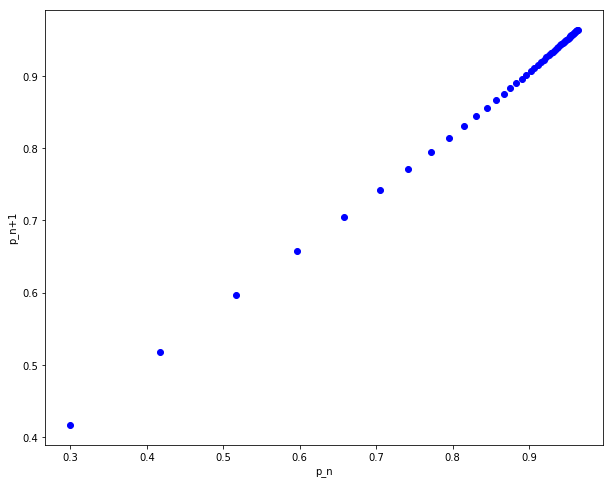

In [132]:
show_balance_points(0.3, alpha=0.7, gamma=0.3)

Когато $\alpha > \gamma$, $p_n \rightarrow 0$ и следователно чернокрилите имат предимство:

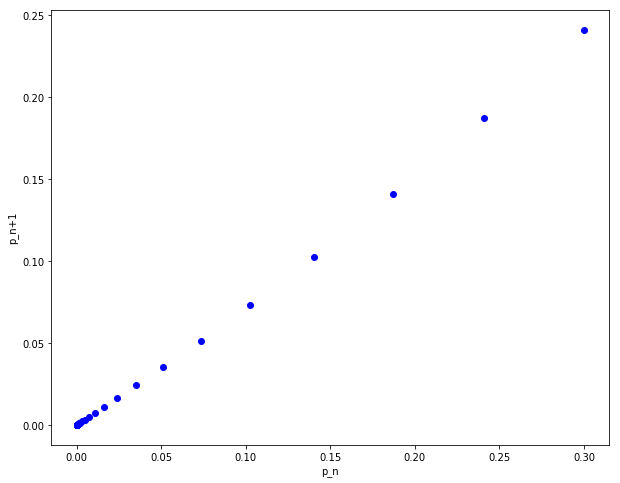

In [141]:
show_balance_points(0.3, alpha=0.4, gamma=0.6)

## Стохастични модели за генетичния дрейф


> **Генетичният дрейф** представлява промяна в честотата на гените (алелите), която е случайна и няма приспособителен
характер.

>Генетичната структура на природните популации е **силно зависими от случайния генетичен дрейф**, тъй като случайните
ефекти могат:
>- да унищожат генетичното разнообразие, изградено чрез мутация
>- да противодействат на естествения отбор,
>- да изградят статистически асоциации между различни локуси в генома

>Затова изясняването на повечето въпроси в еволюционната биология изисква да се вземат под внимание случайните ефекти.

>Значението на случайните ефекти **зависи от много параметри на модела** (размера на популацията или скоростта на мутация).

>В това упражнение ще изведем прости случайни модели, за да разграничим ролята различните фактори и за да получим по-ясна представа за генетичния дрейф.

### Основен модел

В основния модел разглеждаме само един локус с алели A и a.

Двата алела имат честоти fA и fa = 1 − fA .

За простота предполагаме, че поколенията са дискретни и във всяко има мутация и естествен отбор.
По принцип трябва да симулираме мутацията и естествения отбор като случайни процеси.

За да опростим модела, разглеждаме приближение, в което:
1. мутацията и отборът са едновременно детерминистични,
2. крайният размер на популацията се определя чрез вземане„

на извадка от N генома (N е размерът на популацията) след като са се случили мутацията и естественият отбор.

In [46]:
def model(population_size=1000, mutation_rate=0.0001, selection_strenght=0, generations=5000, initial_frequency=0.1, sampling=True):
    frequencies = []
    previous_frequency = initial_frequency
    for i in range(1, generations):
        # Mutation:
        frequency = mutation_rate * (1 - previous_frequency) + (1 - mutation_rate) * previous_frequency # m(1 − fA) + (1 − m)fA
        # Selection:
        average_adaptability = (1 - selection_strenght) * frequency + (1 - frequency)
        frequency = frequency * (1 - selection_strenght) / average_adaptability
        # Sampling:
        if sampling:
            frequency = random.binomial(population_size, frequency) / population_size
        frequencies.append(frequency)
        previous_frequency = frequency

    plt.plot(frequencies)
    plt.show()

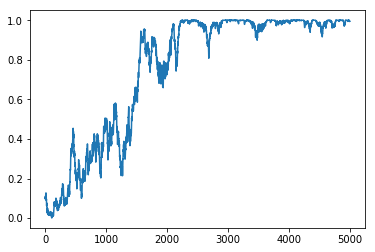

In [47]:
model(population_size=1000, generations=5000, initial_frequency=0.1)

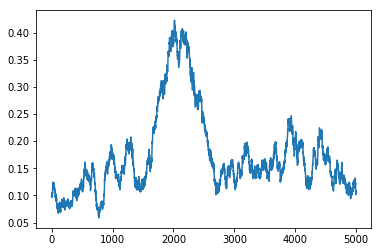

In [48]:
model(population_size=10000, generations=5000, initial_frequency=0.1)

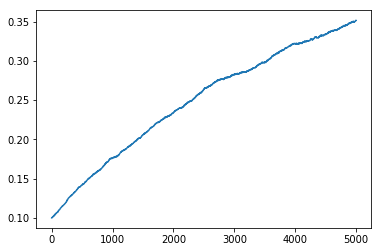

In [49]:
model(population_size=10000000, generations=5000, initial_frequency=0.1)

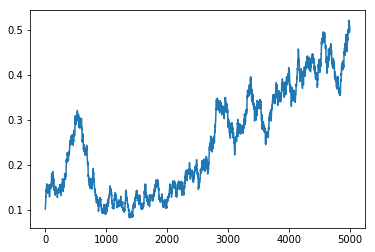

In [50]:
model(population_size=10000, generations=5000, initial_frequency=0.1)

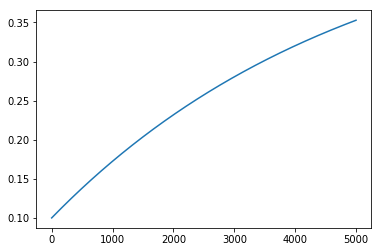

In [51]:
model(population_size=10000, generations=5000, initial_frequency=0.1, sampling=False)

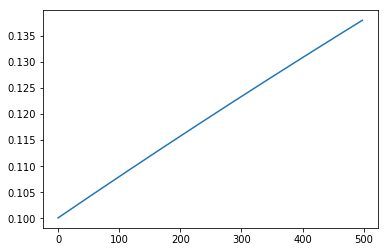

In [53]:
model(population_size=10000, generations=500, initial_frequency=0.1, sampling=False)

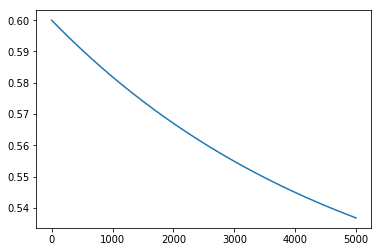

In [54]:
model(population_size=10000, generations=5000, initial_frequency=0.6, sampling=False)

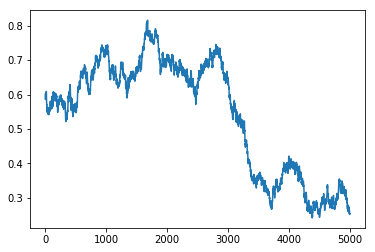

In [68]:
model(population_size=10000, generations=5000, initial_frequency=0.6, sampling=True)

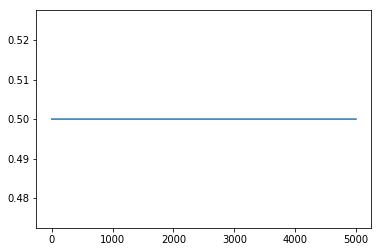

In [55]:
model(population_size=10000, generations=5000, initial_frequency=0.5, sampling=False)

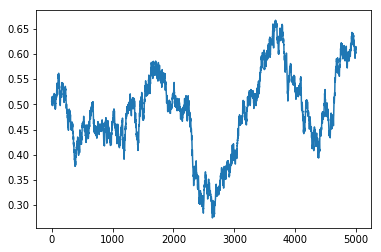

In [65]:
model(population_size=10000, generations=5000, initial_frequency=0.5, sampling=True)

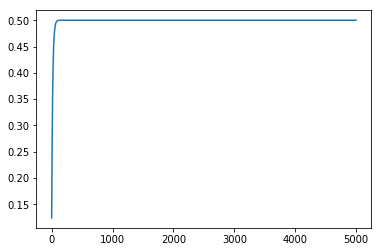

In [56]:
model(population_size=10000, generations=5000, initial_frequency=0.1, sampling=False, mutation_rate=0.03)

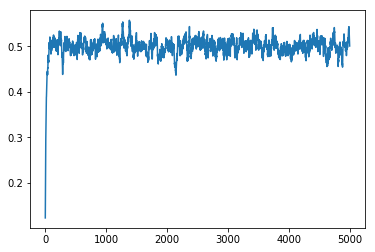

In [62]:
model(population_size=10000, generations=5000, initial_frequency=0.1, sampling=True, mutation_rate=0.03)

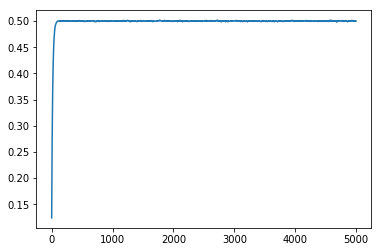

In [95]:
model(population_size=10000000, generations=5000, initial_frequency=0.1, sampling=True, mutation_rate=0.03)

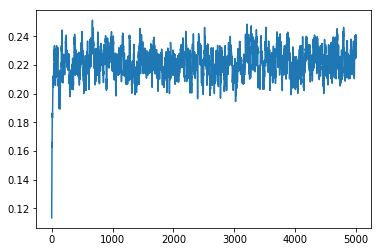

In [74]:
model(population_size=10000, generations=5000, initial_frequency=0.1, mutation_rate=0.03, selection_strenght=0.09)

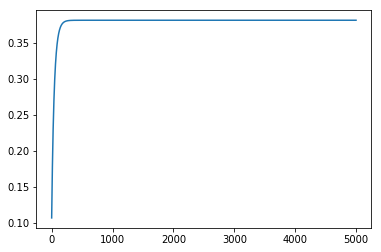

In [94]:
model(population_size=10000, generations=5000, initial_frequency=0.1, mutation_rate=0.01, selection_strenght=0.01, sampling=False)

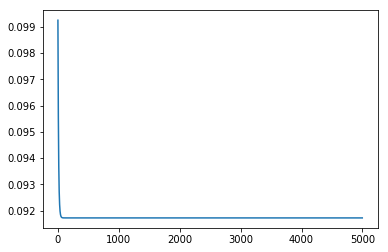

In [97]:
model(population_size=10000, generations=5000, initial_frequency=0.1, mutation_rate=0.01, selection_strenght=0.09, sampling=False)

### Разширен модел (кръстосване)

In [5]:
DEFAULT_FREQUENCIES = {'ab': 0.1, 'Ab': 0.25, 'aB': 0.25, 'AB': 0.4}

def _opposite_allel(allel):
    if ord(allel) < 97:
        return allel.lower()
    return allel.upper()


def _different_allel(locus, diff_index):
    new_locus = ''
    for i, allel in enumerate(locus):
        if (i + 1) in diff_index:
            new_locus += _opposite_allel(allel)
        else:
            new_locus += allel
    return new_locus


def _mutate(frequencies, m): # m - mutation_rate
    new_frequencies = dict()
    for locus, freq in frequencies.items():
        new_frequencies[locus] = ((1 - m)**2)*freq +\
                                 (1 - m) * m * (frequencies[_different_allel(locus, (1,))] + frequencies[_different_allel(locus, (2,))]) +\
                                 (m**2)*frequencies[_different_allel(locus, (1,2))]
    return new_frequencies


def _select(f, s): # f - frequencies, s - selection strengths (dicts per locus type)
    new_frequencies = dict()
    average_adaptability = sum([s[locus] * f[locus] for locus in f])
    for locus in f:
        new_frequencies[locus] = f[locus] * s[locus] / average_adaptability
    return new_frequencies


def _recombinate(f, r): # f - frequencies, r - recombination rate
    D = f['ab'] * f['AB'] - f['Ab'] * f['aB'] # коефициентът на неравновесие на свързване на гените
    new_frequencies = dict()
    new_frequencies['ab'] = f['ab'] - r * D
    new_frequencies['AB'] = f['AB'] - r * D
    new_frequencies['Ab'] = f['Ab'] + r * D
    new_frequencies['aB'] = f['aB'] + r * D
    return new_frequencies


def model_two_loci(
        population_size=1000, mutation_rate=0.0001, selection_strengths=None,
        generations=5000, initial_frequencies=None, recombination_rate=0.1):
    initial_frequencies = initial_frequencies or DEFAULT_FREQUENCIES
    assert sum(list(initial_frequencies.values())) == 1.0, "All frequencies must equal 1.0"
    frequencies_values = list()
    previous_frequencies = initial_frequencies
    for i in range(1, generations):
        # Mutation:
        frequencies = _mutate(previous_frequencies, mutation_rate)
        # Selection:
        frequencies = _select(frequencies, selection_strengths)
        # Recombination:
        frequencies = _recombinate(frequencies, recombination_rate)
        # Sampling:
        freqs = sorted(frequencies.items())
        freqs_values = [x[1] for x in freqs]
        freqs_values = [x / population_size for x in random.multinomial(population_size, freqs_values)]
        frequencies_values.append(freqs_values)
        frequencies = dict(zip([x[0] for x in freqs], freqs_values))
        previous_frequencies = frequencies

    graph = plt.plot(frequencies_values)
    first_legend = plt.legend(graph, sorted(previous_frequencies))
    plt.ylabel("frequency")
    plt.xlabel("generation")
    plt.rcParams["figure.figsize"] = 10, 8
    plt.show()

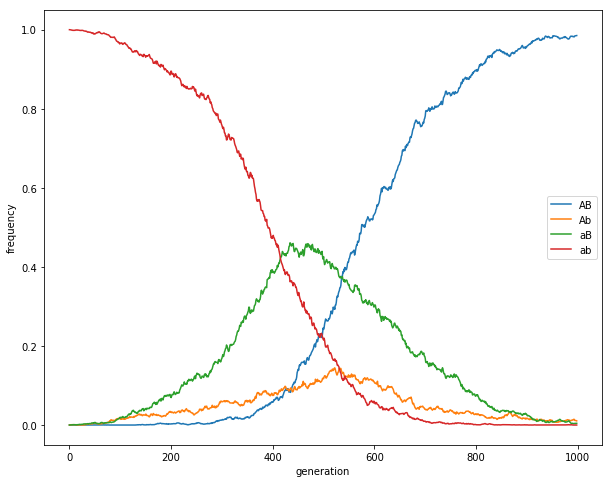

In [17]:
model_two_loci(
    initial_frequencies={'ab': 1, 'Ab': 0, 'aB': 0, 'AB': 0},
    selection_strengths={'ab': 1, 'Ab': 1.01, 'aB': 1.01, 'AB': 1.02},
    population_size=10000, generations=1000, recombination_rate=0.1)

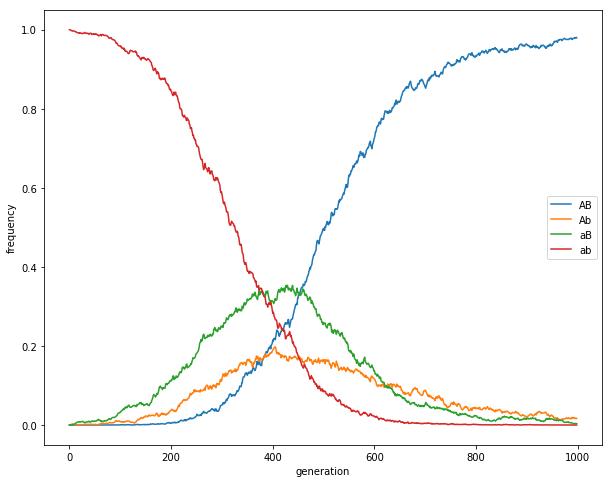

In [16]:
model_two_loci(
    initial_frequencies={'ab': 1, 'Ab': 0, 'aB': 0, 'AB': 0},
    selection_strengths={'ab': 1, 'Ab': 1.01, 'aB': 1.01, 'AB': 1.02},
    population_size=10000, generations=1000, recombination_rate=0.4)